# HW 1

## Task
<img src="https://www.mdpi.com/entropy/entropy-17-06289/article_deploy/html/images/entropy-17-06289-g001.png" width="400">

1 part(85%)

- Do the same but take  b0  into account.
- Write state-space model for a spring-damper system
- Make simulation

2 part (15%)

- System from Ogata B-3-4 (Same task)

# From linear ODE to State Space

Given an ODE:

$$m\ddot x+b_{1}\dot x + k x= F$$

find its state space representation:

$$\dot x = Ax + b$$

In [501]:
# task 1
# F = 0.5
# m = 0.6
# b = 0.5
# k = 0.8

# task 2

m = 0.1
F = 0
b = 0
k = 0.2

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

n = 3                     
a = np.array([m, b, k])     
a_norm = a[1:] / m     
A = np.zeros((n-1, n-1))  
A[0 , 0:] = -a_norm
A[1:, 0:(n-2)] = np.eye(n-2)

B = np.zeros(A.shape[0])
B[0] = F/m

# print("Our matrix A:", "Our matrix B:")
# print(A, B)

In [503]:
def equationSimplie(x, t):
    res = np.dot(A, x) +  B
    return res

time = np.linspace(0, 15, 1000)   
x0 = [0.1, 0.1]
res = odeint(equationSimplie, x0, time).T

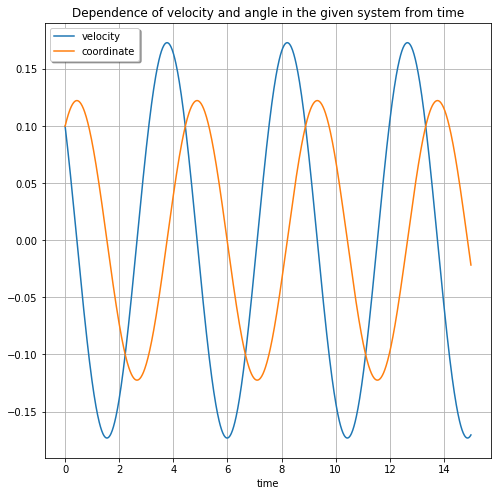

In [505]:
fig = plt.figure(figsize=(8, 8))
plt.title("Dependence of velocity and angle in the given system from time")
plt.xlabel("time")
plt.plot(time, res[0], label="velocity")
plt.plot(time, res[1], label="coordinate")
plt.grid()
plt.legend(shadow=True)

In [507]:
fig.savefig("res2.png")

## Theoretical solution:
$$A = WDW^{-1}$$
$$W^{-1}\dot{x} = DW^{-1}x + W^{-1}b$$
<center>let B = $W^{-1}b$<br>
let R = $W^{-1}x$</center>

$$\dot{R} = DR + B$$
$$x = WR$$

# Real homework

## Task

Consider the system
$3.2316y (6) + 2.2279y (5) + 2.4488y (4) + 0.9344y (3) + 3.9760y (2) + 1.8276y = b_0$ .

For b_0 = 0 and b 0 = 0.7094 answer the following questions:
- is the ODE stable? Does its solution converge or diverge?
- How can you explain it?
- How would you analyse eigenvalues of an LTV system? What does that
even mean?

For spring-mass-damper system derive state-space model and transferfunc-
tion. Moreover, for physically consistent parameters (m ≥ 0, b ≥ 0, k ≥ 0)
obtain as many types of equilibrium points as you can (center, saddle point,
etc.). Draw phase portrait for each case.

### Part1

In [139]:
import numpy as np

n = 7                     # degree of the polynomial 
a = np.array([3.2316, 2.2279, 2.4488, 0.9344, 3.9760, 0, 1.8276])    # coefficients: [a0 a1 ... ak]
print("Our coeffitients a are:", a)

a_norm = a[1:] / a[0]     # divide by "ak"

A = np.zeros((n-1, n-1))  # state matrix
A[0 , 0:] = -a_norm
A[1:, 0:(n-2)] = np.eye(n-2)

print("Our matrix A:")
print(A)

B = np.zeros((n-1, 1))
B[0] = 0.7094 / a[0]
B = B.T[0]

Our coeffitients a are: [3.2316 2.2279 2.4488 0.9344 3.976  0.     1.8276]
Our matrix A:
[[-0.68941082 -0.75776705 -0.2891447  -1.23035029 -0.         -0.56554029]
 [ 1.          0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]]


In [140]:
B

array([0.21951974, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [141]:
np.linalg.eig(A)[0]

array([-0.88310149+0.76221959j, -0.88310149-0.76221959j,
        0.55078504+0.71738984j,  0.55078504-0.71738984j,
       -0.01238896+0.7126587j , -0.01238896-0.7126587j ])

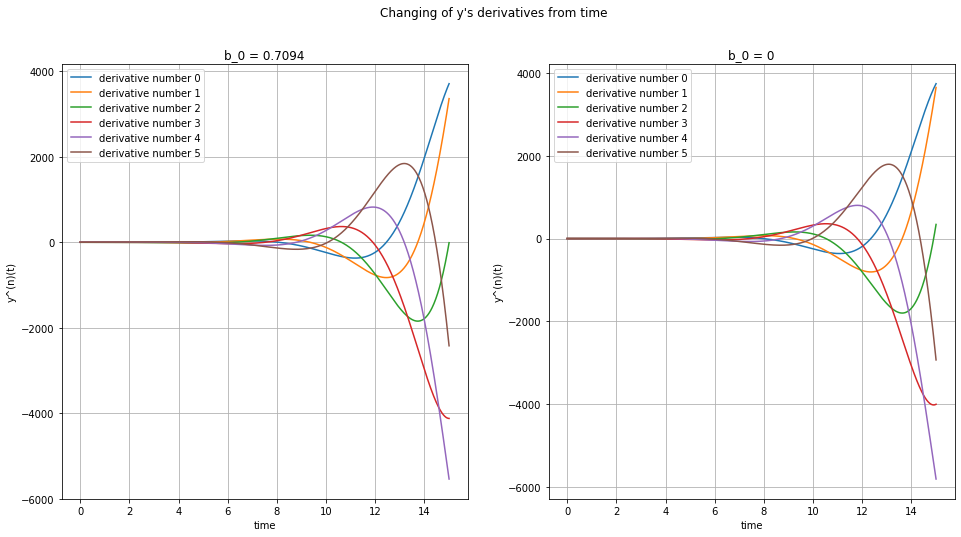

In [142]:
def equationSimplie(x, t):
    res = np.dot(A, x) + B
#     print(res-np.dot(A, x))
    return res

time = np.linspace(0, 15, 1000)   
x0 = np.random.rand(6)
res = odeint(equationSimplie, x0, time)
f = plt.figure(figsize=(16, 8))
f.suptitle("Changing of y's derivatives from time")

plt.subplot(121)
plt.title("b_0 = 0.7094")
for i in range(n-1):
    plt.plot(time, res.T[i], label="derivative number {}".format(i))
plt.xlabel('time')
plt.ylabel('y^(n)(t)')
plt.grid()
plt.legend()


plt.subplot(122)
plt.title("b_0 = 0")
B = 0
res = odeint(equationSimplie, x0, time)
for i in range(n-1):
    plt.plot(time, res.T[i], label="derivative number {}".format(i))
plt.xlabel('time')
plt.ylabel('y^(n)(t)')
plt.grid()
plt.legend()

In [143]:
f.savefig("system.png")

### Part2

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

n = 3                     
A = np.array([[10, 3], [5, -5]])
B = np.array([1, 0])

print(A)
print(np.linalg.eig(A))

[[10  3]
 [ 5 -5]]
(array([10.94097151, -5.94097151]), array([[ 0.9541651 , -0.18494764],
       [ 0.29928073,  0.98274838]]))


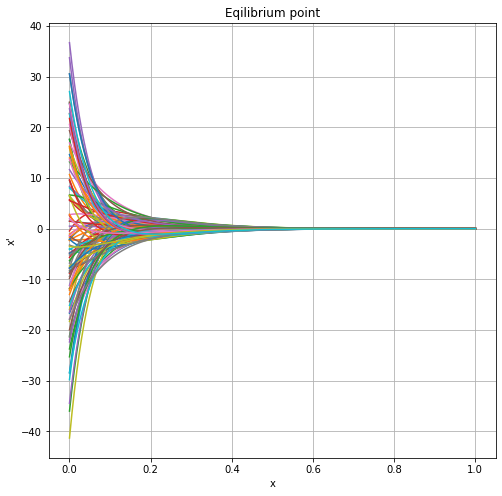

In [36]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt


k_1 = [8, 5.4]
k_2 = [30, 13]

def u(x):
    return -np.dot(np.array(k_2),x)

def LinearODE(x, t):
    r = A - np.array([k_2, [0, 0]])
    return np.dot(r, x)

time = np.linspace(0, 1, 1000)   
x0s = np.random.rand(100, 2)*2 - 1  # initial states

plt.figure(figsize=(8, 8))
plt.title("Eqilibrium point")
plt.xlabel("x")
plt.ylabel("x'")
# ode based model
for x0 in x0s:
    res = odeint(LinearODE, x0, time).T
#     plt.plot(time, res[0])
#     plt.plot(res[0], res[1])
    plt.plot(time, u(res))

plt.grid()
# plt.show()
# plt.savefig("2center.png")

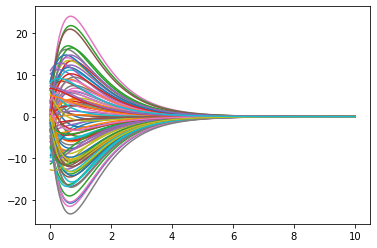

In [38]:

def u(x):
    return -np.dot(np.array(k_1),x)

def LinearODE(x, t):
    r = A - np.array([k_1, [0, 0]])
    return np.dot(r, x)
time = np.linspace(0, 10, 1000)   

for x0 in x0s:
    res = odeint(LinearODE, x0, time).T
#     plt.plot(time, res[0])
#     plt.plot(res[0], res[1])
    plt.plot(time, u(res))